In [7]:
import pandas as pd
from sklearn.feature_selection import r_regression
import matplotlib.pyplot as plt
data = pd.read_csv("train.csv")
X, y, smiles = data.drop(["Tm","id","SMILES"], axis=1), data["Tm"], data["SMILES"]

In [8]:
X

,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,Group 9,Group 10,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2660,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
smiles

0             FC1=C(F)C(F)(F)C1(F)F
1       c1ccc2c(c1)ccc3Nc4ccccc4c23
2               CCN1C(C)=Nc2ccccc12
3                        CC#CC(=O)O
4                         CCCCC(S)C
                   ...             
2657                         ClCCBr
2658                 N#CC(Cl)(Cl)Cl
2659             Cc1ccc2c(C)cccc2c1
2660          CCC(=O)c1ccc2ccccc2c1
2661              Brc1ccc(cc1)N(C)C
Name: SMILES, Length: 2662, dtype: object

Can put in some transformer to obtain additional prediction

In [10]:
y

0       213.15
1       407.15
2       324.15
3       351.15
4       126.15
         ...  
2657    256.45
2658    231.15
2659    256.25
2660    333.15
2661    328.15
Name: Tm, Length: 2662, dtype: float64

Top 50 variables most correlated with the target:
Group 15     0.387580
Group 18     0.223551
Group 16     0.223530
Group 401    0.222525
Group 17     0.194420
Group 1      0.186595
Group 123    0.179178
Group 365    0.176346
Group 31     0.171773
Group 412    0.165621
Group 30     0.162579
Group 5      0.158361
Group 326    0.151604
Group 62     0.150432
Group 373    0.129026
Group 403    0.125958
Group 126    0.122881
Group 221    0.120362
Group 180    0.114525
Group 19     0.110682
Group 392    0.110205
Group 7      0.109899
Group 119    0.109563
Group 227    0.109124
Group 32     0.107192
Group 372    0.106768
Group 80     0.106296
Group 3      0.104648
Group 229    0.104042
Group 170    0.101924
Group 328    0.100826
Group 98     0.099892
Group 20     0.099776
Group 53     0.096433
Group 175    0.093156
Group 176    0.091605
Group 2      0.089414
Group 409    0.087669
Group 129    0.086298
Group 222    0.085987
Group 367    0.085266
Group 388    0.085180
Group 86     0.084960
Grou

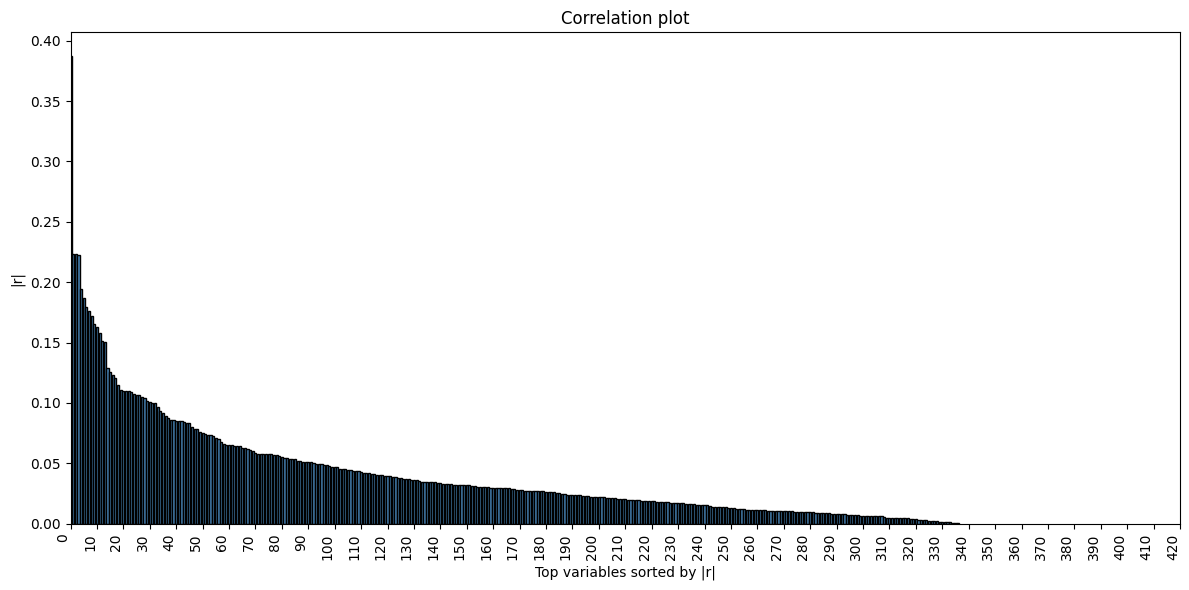

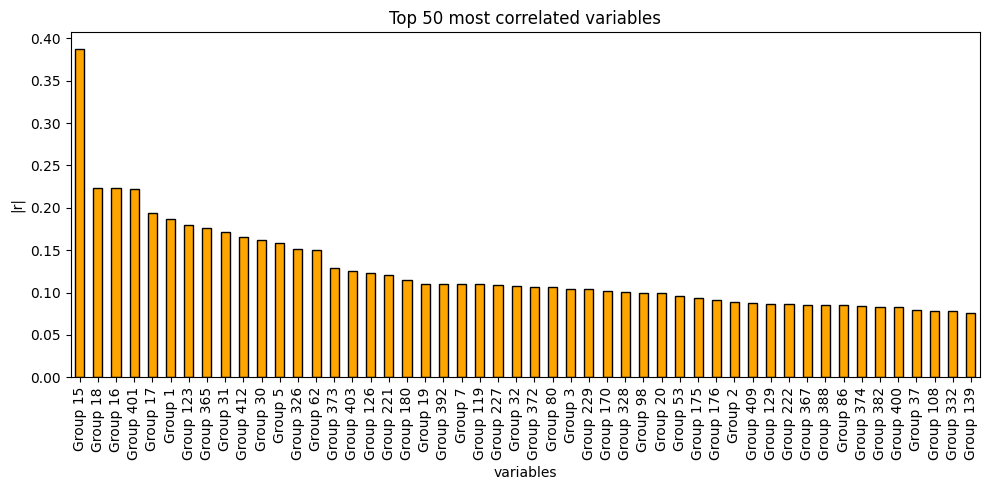

In [17]:
df_corr = pd.concat([X, y], axis=1).select_dtypes(include='number')

correlations = df_corr.corr(numeric_only=True)['Tm'].drop('Tm')

abs_corr = correlations.abs().sort_values(ascending=False)

top50 = abs_corr.head(50)

print("Top 50 variables most correlated with the target:")
print(top50)


plt.figure(figsize=(12, 6))
plt.bar(range(len(abs_corr)), abs_corr.values, color='steelblue', edgecolor='black')
plt.title("Correlation plot")
plt.ylabel("|r|")
plt.xlabel("Top variables sorted by |r|")

step = 10
xticks_idx = range(0, len(abs_corr), step)
plt.xticks(xticks_idx, xticks_idx, rotation=90, ha='right')
plt.xlim(0, 420)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
top50.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Top 50 most correlated variables")
plt.ylabel("|r|")
plt.xlabel("variables")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

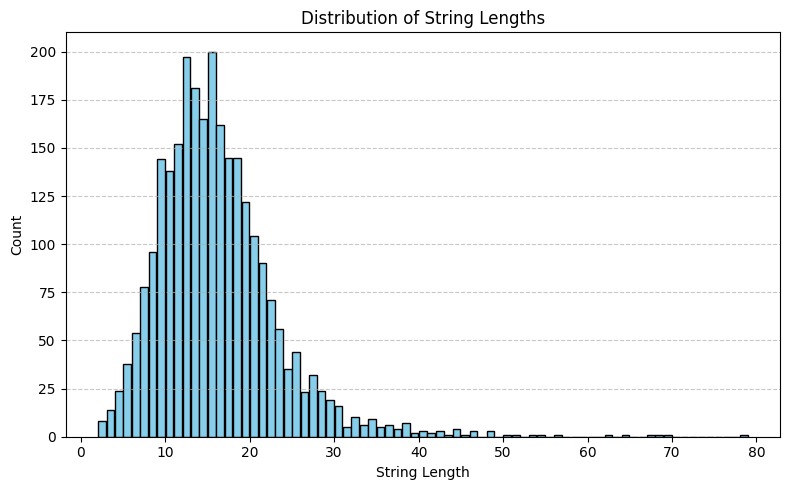

In [21]:
texts = smiles.tolist()
# Compute string lengths
lengths = [len(t) for t in texts]

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(lengths, bins=range(min(lengths), max(lengths) + 2), color='skyblue', edgecolor='black', rwidth=0.9)

plt.title("Distribution of String Lengths")
plt.xlabel("String Length")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Cut to 50 is reasonable